In [55]:
#imports
import sys
import os
from os.path import join
import glob
import pandas as pd
import numpy as np
import time
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
# load data
dataroot = '/content/drive/MyDrive/IDS(attacks&Defense)'
SEED=2

In [58]:
df_data=pd.read_csv("/content/drive/MyDrive/CICIDS2017/data_set.csv")
df_data.shape

(2830743, 79)

In [59]:
df = df_data.sample(frac =.5, random_state = np.random.permutation(len(df_data)))
#df = df_data
print (df.shape)
#df.describe()
del df_data

(1415372, 79)


In [60]:
#df = df[:5000]
#df.shape

In [61]:
#df.info()

In [62]:
#df.head()

In [63]:
# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
df.isnull().sum().sum()

665

In [64]:
# from matplotlib.pyplot import figure
# figure(figsize=(12, 3), dpi=80)
# df.isna().sum().plot(kind='bar')

In [65]:
q1 = df.loc[df['Label'] == 'Web Attack-Sql Injection'] #[['num','val']]
q1

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1612058,80,5006127,4,4,447,530,447,0,111.75,223.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612468,80,43,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614224,80,73,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614355,80,5012479,6,4,600,4149,600,0,100.00,244.948974,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612094,80,5069927,4,4,460,1840,460,0,115.00,230.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1614998,80,5009163,4,4,599,2021,599,0,149.75,299.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1613336,80,5009041,4,4,523,530,523,0,130.75,261.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612939,80,48,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1612802,80,5086516,5,4,600,4149,600,0,120.00,268.328157,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection
1615007,80,73,1,1,0,0,0,0,0.00,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Web Attack-Sql Injection


In [66]:
q2 = df.loc[df['Label'] == 'Heartbleed'] #[['num','val']]
q2

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2735215,444,119262215,2792,2110,13712,7878135,5792,0,4.911175,110.376448,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735550,444,119259886,2782,2091,12264,7879536,4344,0,4.408339,83.390470,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735847,444,119299621,2805,2028,13712,7878627,5792,0,4.888414,110.120790,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed
2735305,444,119260295,2791,2114,13712,7878088,5792,0,4.912934,110.396187,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Heartbleed


In [67]:
q3 = df.loc[df['Label'] == 'Infiltration'] #[['num','val']]
q3

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1320434,444,4042518,2,1,101,6,95,6,50.500000,62.932504,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1372504,444,24006815,35,35,13418,210,1460,6,383.371429,499.569408,...,20,4.963369e+06,0.000000e+00,4963369,4963369,18500000.0,0.000000e+00,18500000,18500000,Infiltration
1306253,444,5005212,15,15,0,90,0,0,0.000000,0.000000,...,28,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1409181,444,101039258,26,26,5810,156,1177,6,223.461538,324.522940,...,20,5.582857e+05,1.091982e+04,570883,551515,32900000.0,1.910000e+07,55000000,21600000,Infiltration
1441063,444,111406728,21,21,4584,126,705,6,218.285714,254.824870,...,20,5.832270e+05,1.907774e+03,584576,581878,54800000.0,1.449569e+03,54800000,54800000,Infiltration
1299546,444,42664070,5,6,141,291,93,0,28.200000,38.861292,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,Infiltration
1315648,444,119382036,1157,1157,319630,6942,1271,6,276.257563,265.155894,...,20,8.742789e+06,8.670544e+06,21700000,3735603,13600000.0,9.693511e+06,24800000,5373451,Infiltration
1318793,444,86726608,1775,1775,785275,10650,1274,6,442.408451,251.446955,...,20,2.310000e+07,2.610000e+07,41600000,4649995,17400000.0,1.620000e+07,28800000,5953706,Infiltration
1405503,444,104790355,15,15,5066,90,1036,6,337.733333,402.143447,...,20,5.715800e+05,0.000000e+00,571580,571580,104000000.0,0.000000e+00,104000000,104000000,Infiltration
1348359,444,66695827,32,34,11898,460,1460,0,371.812500,505.355029,...,20,3.763310e+05,3.625700e+05,730747,6123,21700000.0,1.490000e+07,37000000,7268675,Infiltration


In [68]:
df_label = df['Label']

In [69]:
# change the label column
df_label = df_label.replace({ 'Web Attack-Sql Injection' : 'Web Attack', 
                               'Heartbleed' : 'Web Attack',
                               'Infiltration' : 'Web Attack',
                               'Web Attack-Brute Force' : 'Web Attack',
                               'Web Attack-XSS' : 'Web Attack'
                               })

In [70]:
# dropping bad columns, they coause issues due to large numbers
data = df.drop(columns=['Flow Packets/s','Flow Bytes/s', 'Label'])
del df

#filling missing features
data.fillna(data.mean(), inplace=True)

#convert data to numeric
data = data.astype(float).apply(pd.to_numeric)

# lets count if there is NaN values in our dataframe( AKA missing features)
#we should see `0`
data.isnull().sum().sum()

0

In [71]:
# print label distribution
pd.DataFrame(df_label.value_counts()).to_csv('class_distribution.csv')
df_label.value_counts()

BENIGN              1136168
DoS Hulk             115787
PortScan              79570
DDoS                  63978
DoS GoldenEye          5140
FTP-Patator            3998
SSH-Patator            2954
DoS slowloris          2897
DoS Slowhttptest       2735
Web Attack             1110
Bot                    1035
Name: Label, dtype: int64

In [72]:
label_names = pd.Series(df_label, name='Label').unique()
label_names

array(['DDoS', 'BENIGN', 'DoS Hulk', 'PortScan', 'DoS GoldenEye',
       'SSH-Patator', 'FTP-Patator', 'DoS Slowhttptest', 'DoS slowloris',
       'Web Attack', 'Bot'], dtype=object)

In [73]:
#,'Infiltration' ,'Web Attack-Sql Injection',

In [74]:
len (label_names)

11

In [75]:
data.shape

(1415372, 76)

# Data Imbalance

In [76]:
def make_value2index(attacks):
    #make dictionary
    attacks = sorted(attacks)
    d = {}
    counter=0
    for attack in attacks:
        d[attack] = counter
        counter+=1
    return d

In [77]:
# chganges label from string to integer/index
def encode_label(Y_str):
    labels_d = make_value2index(np.unique(Y_str))
    Y = [labels_d[y_str] for y_str  in Y_str]
    Y = np.array(Y)
    return np.array(Y)

In [78]:
X = data.values
y = encode_label(df_label.values)

del data

In [79]:
# normalization
def normalize(data):
    data = data.astype(np.float32)       
    eps = 1e-15
    mask = data==-1
    data[mask]=0
    mean_i = np.mean(data,axis=0)
    min_i = np.min(data,axis=0) #  to leave -1 (missing features) values as is and exclude in normilizing
    max_i = np.max(data,axis=0)
    r = max_i-min_i+eps
    data = (data-mean_i)/r  # zero centered 
    #deal with missing features -1
    data[mask] = 0        
    return data

In [80]:
X = normalize(X)

In [81]:
def reshape_dataset_cnn(x: np.ndarray) -> np.ndarray:
    # Add padding columns    
    result = np.zeros((x.shape[0], 81))
    result[:, :-5] = x

    # Reshaping dataset
    result = np.reshape(result, (result.shape[0] ,-1, 9, 9 ))
    #result = result[..., tf.newaxis]
    return result

In [82]:
X = reshape_dataset_cnn(X)
X.shape , y.shape

((1415372, 1, 9, 9), (1415372,))

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1132297, 1, 9, 9), (1132297,), (283075, 1, 9, 9), (283075,))

In [84]:
import torch
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


# CNN Model

In [85]:
from torch.utils.data import TensorDataset
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torch.nn as nn

from tqdm import tqdm
from torch.autograd import Variable

In [86]:
epochs = 10
lr= 0.01
milestones = [50, 75]
gamma = 0.1
batch_size = 128
input_dim = X_train.shape[1]
num_class = len(np.unique(df_label))
accuracies = {}

In [87]:
np.unique(df_label)

array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'PortScan',
       'SSH-Patator', 'Web Attack'], dtype=object)

In [88]:
num_class

11

In [89]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MnistCNN(nn.Module):

    def __init__(self,input_dim,num_classes):
        super(MnistCNN, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        
        self.conv1 = nn.Conv2d(1, 32, 3,1)
        self.conv2 = nn.Conv2d(32, 64, 3 ,1)
        self.fc3 = nn.Linear(64, 64)
        #self.fc4 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(input_dim*64,num_classes)
        #fc_layers.append(nn.Linear(input_dim*128,num_classes))
        
    def forward(self, x):    
        h = F.relu(self.conv1(x))        
        h = F.relu(self.conv2(h))        
        h = F.dropout2d(F.max_pool2d(h, 5), p=0.25)
        h = F.dropout2d(self.fc3(h.view(h.size(0), -1)), p=0.5)
        h = self.fc4(h)
        return F.log_softmax(h,dim=1)
    

class CifarCNN(nn.Module):

    def __init__(self , num_classes):
        super(CifarCNN, self).__init__()
        self.num_classes = num_classes
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, 3, padding=2)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=2)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3, padding=2)
        self.bn4 = nn.BatchNorm2d(128)
        self.fc5 = nn.Linear(512, 256)
        self.fc6 = nn.Linear(256, 256)
        self.fc7 = nn.Linear(256, num_classes)

    def forward(self, x):
        h = F.relu(self.bn1(self.conv1(x)))        
        h = F.relu(self.bn2(self.conv2(h))) 
        #h = F.leaky_relu(self.bn1(self.conv1(x)))
        #h = F.leaky_relu(self.bn2(self.conv2(h)))      
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn3(self.conv3(h)))
        #h = F.leaky_relu(self.bn3(self.conv3(h)))   
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.bn4(self.conv4(h)))
        #h = F.leaky_relu(self.bn4(self.conv4(h)))       
        h = F.max_pool2d(h, 2)        
        h = F.relu(self.fc5(h.view(h.size(0), -1)))
        #h = F.leaky_relu(self.fc5(h.view(h.size(0), -1)))
        h = F.relu(self.fc6(h))
        #h = F.leaky_relu(self.fc6(h))
        h = self.fc7(h)
        return F.log_softmax(h,dim=1)

In [90]:
def accuracy(y, t):
    pred = y.data.max(1, keepdim=True)[1]
    acc = pred.eq(t.data.view_as(pred)).cpu().sum()
    return acc

In [91]:
print("Generating Model ...")
print("-" * 60)

tensor_x_train = torch.stack([torch.Tensor(i) for i in X_train]).to(device)
tensor_y_train = torch.LongTensor(y_train).to(device)

train_data = TensorDataset(tensor_x_train,tensor_y_train)     
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)      


tensor_x_test = torch.stack([torch.Tensor(i) for i in X_test]).to(device)
tensor_y_test = torch.LongTensor(y_test).to(device)

test_data = TensorDataset(tensor_x_test,tensor_y_test)     
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)      

#model = MnistCNN(input_dim=input_dim  , num_classes=num_class)
#print (model)

model = CifarCNN(num_classes=num_class)
print (model)

Generating Model ...
------------------------------------------------------------
CifarCNN(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc5): Linear(in_features=512, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=256, bias=True)
  (fc7): Linear(in_features=256, out_features=11, bias=True)
)


In [92]:
train_accu = []
train_losses = []
eval_losses=[]
eval_accu=[]

cudnn.benchmark = True
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay=0.001)
scheduler = lr_scheduler.MultiStepLR(opt, milestones=milestones, gamma=gamma)
loss_func = nn.CrossEntropyLoss().to(device)

print_str = "\t".join(["{}"] + ["{:.6f}"] * 4)
print("\t".join(["{:}"] * 5).format("Epoch", "TrainLoss", "TestLoss", "TrainAcc.", "TestAcc."))
for e in range(epochs):
    train_loss, train_acc, train_n = 0, 0, 0
    test_loss, test_acc, test_n = 0, 0, 0

    model.train()
    for x, t in tqdm(train_loader, total=len(train_loader), leave=False):
        x, t = Variable(x.to(device)), Variable(t.to(device))        
        y = model(x)                
        loss = loss_func(y, t)
        opt.zero_grad()
        loss.backward()
        opt.step()
        train_loss += loss.item() * t.size(0)
        train_acc += accuracy(y, t)        
        train_n += t.size(0)
    
    model.eval()
    for x, t in tqdm(test_loader, total=len(test_loader), leave=False):
        x, t = Variable(x.to(device)), Variable(t.to(device))
        y = model(x)
        loss = loss_func(y, t)

        test_loss += loss.item() * t.size(0)
        test_acc += accuracy(y, t)     
        
        test_n += t.size(0)
    scheduler.step()
    
    running_loss_train = train_loss / train_n
    accu_train = train_acc / train_n * 100
   
    train_accu.append(accu_train)
    train_losses.append(running_loss_train)
    
    
    running_loss_test =  test_loss / test_n
    accu_test =  test_acc / test_n * 100
    
    eval_losses.append(running_loss_test)
    eval_accu.append(accu_test)
    
    #print(print_str.format(e, train_loss / train_n, test_loss / test_n,
    #                       train_acc / train_n * 100, test_acc / test_n * 100)  , flush=True)
    
    print(print_str.format(e, running_loss_train , running_loss_test,   accu_train  ,accu_test )  , flush=True)
     
torch.save({"state_dict": model.state_dict()},"/content/drive/MyDrive/IDS(attacks&Defense)/models/CifarCNN.tar")

Epoch	TrainLoss	TestLoss	TrainAcc.	TestAcc.


0	0.092067	0.075152	96.538010	97.034355


1	0.065652	0.122773	97.364120	94.577057


2	0.062509	0.101848	97.486969	96.567337


3	0.059394	0.061507	97.582527	96.267769


4	0.055325	0.109059	97.662979	96.473022


5	0.054062	0.060975	97.700249	97.279518


6	0.052043	0.101483	97.763573	96.651772


7	0.051322	0.074492	97.810997	96.073128


8	0.053248	0.113826	97.752449	95.386734


9	0.051835	0.048314	97.807907	97.513733


In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

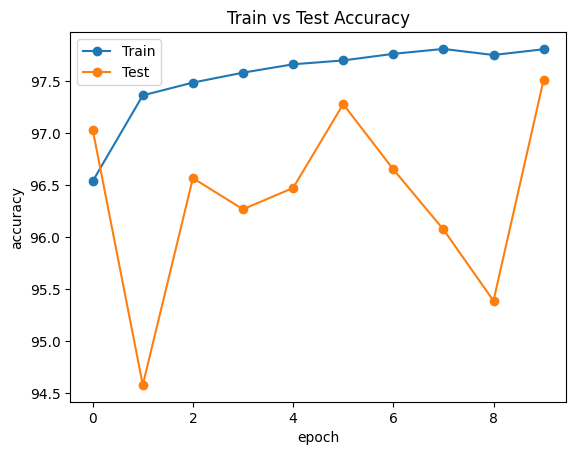

In [94]:
plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.title('Train vs Test Accuracy')
 
plt.show()

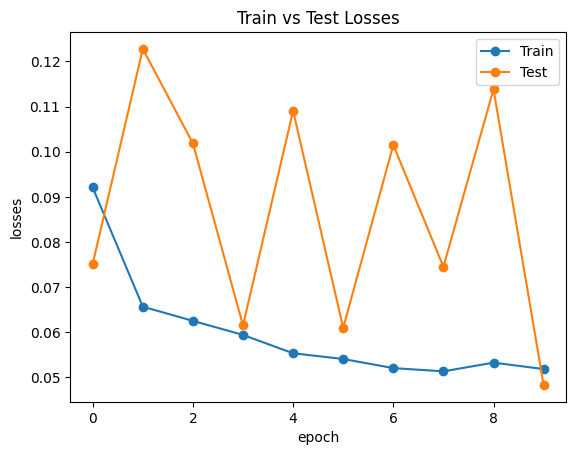

In [95]:
plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Test'])
plt.title('Train vs Test Losses')
 
plt.show()

In [96]:
from tqdm import tqdm
y_true = []
y_pred = []

for data in tqdm(test_loader):
    images,labels=data[0].to(device),data[1]  
    y_true.extend(labels.numpy())

    outputs=model(images)

    _, predicted = torch.max(outputs, 1)
    y_pred.extend(predicted.cpu().numpy())

100%|██████████| 2212/2212 [02:30<00:00, 14.67it/s]


In [104]:
#print(y_pred)
#print(y_true)

In [108]:
from sklearn.metrics import precision_score, recall_score ,f1_score

print('Precision is: ', precision_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))* 100)
print('Recall is: ', recall_score(y_true, y_pred , average='weighted', labels=np.unique(y_pred))* 100)
print('F1 is: ', f1_score(y_true, y_pred, average='weighted', labels=np.unique(y_pred))* 100)

Precision is:  97.54535876298652
Recall is:  97.51373310959993
F1 is:  97.44402928157095


In [106]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)

In [107]:
cf_matrix

array([[224945,      2,    148,     39,     48,     71,      4,      3,
          1976,      0,      0],
       [   130,     69,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [   152,      0,  12446,      2,     39,      0,      0,      0,
             0,      0,      0],
       [    34,      0,      0,   1036,      0,      0,      0,      0,
             0,      0,      0],
       [  2182,      0,      4,      0,  21041,      0,      0,      0,
             0,      0,      0],
       [     5,      0,      0,      0,      0,    540,      5,      0,
             0,      0,      0],
       [    38,      0,      0,      0,      1,     13,    525,      0,
             0,      0,      0],
       [    13,      0,      0,      0,      0,      0,      0,    790,
             0,      0,      0],
       [  1599,      0,      2,      1,      4,      0,      0,      0,
         14328,      0,      0],
       [   300,      0,      0,      0,      1,      0,

In [101]:
label_names

array(['DDoS', 'BENIGN', 'DoS Hulk', 'PortScan', 'DoS GoldenEye',
       'SSH-Patator', 'FTP-Patator', 'DoS Slowhttptest', 'DoS slowloris',
       'Web Attack', 'Bot'], dtype=object)

In [102]:
class_names = (['BENIGN', 'DoS Hulk', 'DDoS', 'FTP-Patator', 'PortScan',
       'DoS GoldenEye', 'SSH-Patator', 'Web Attack', 'DoS slowloris',
       'DoS Slowhttptest', 'Bot'])      

# Create pandas dataframe
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)

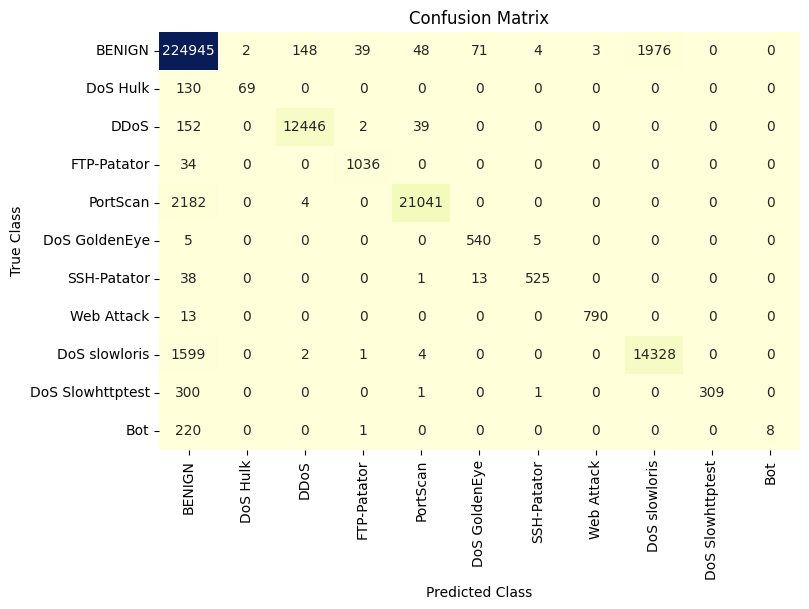

In [103]:
plt.figure(figsize=(8, 6))

# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None,cmap="YlGnBu",fmt="d")

plt.title("Confusion Matrix"), plt.tight_layout()

plt.ylabel("True Class"), 
plt.xlabel("Predicted Class")
plt.show()